In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 476, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 476 (delta 141), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (476/476), 131.59 KiB | 16.45 MiB/s, done.
Resolving deltas: 100% (243/243), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.4 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has a Tesla T4 GPU!
We will install the latest stable RAPIDS via pip 24.4.*!  Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.3/473.3 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 605

In [ ]:
import cudf
import cuml
import os
import numpy as np
import pandas as pd
import h5py

In [ ]:
column_names = [
    'uav',
    'uplink_size_mean', 'uplink_size_median', 'uplink_size_MAD',
    'uplink_size_STD', 'uplink_size_Skewness', 'uplink_size_Kurtosis',
    'uplink_size_MAX', 'uplink_size_MIN', 'uplink_size_MeanSquare',
    'downlink_size_mean', 'downlink_size_median', 'downlink_size_MAD',
    'downlink_size_STD', 'downlink_size_Skewness', 'downlink_size_Kurtosis',
    'downlink_size_MAX', 'downlink_size_MIN', 'downlink_size_MeanSquare',
    'both_links_size_mean', 'both_links_size_median', 'both_links_size_MAD',
    'both_links_size_STD', 'both_links_size_Skewness', 'both_links_size_Kurtosis',
    'both_links_size_MAX', 'both_links_size_MIN', 'both_links_size_MeanSquare',
    'uplink_interval_mean', 'uplink_interval_median', 'uplink_interval_MAD',
    'uplink_interval_STD', 'uplink_interval_Skewness', 'uplink_interval_Kurtosis',
    'uplink_interval_MAX', 'uplink_interval_MIN', 'uplink_interval_MeanSquare',
    'downlink_interval_mean', 'downlink_interval_median', 'downlink_interval_MAD',
    'downlink_interval_STD', 'downlink_interval_Skewness', 'downlink_interval_Kurtosis',
    'downlink_interval_MAX', 'downlink_interval_MIN', 'downlink_interval_MeanSquare',
    'both_links_interval_mean', 'both_links_interval_median', 'both_links_interval_MAD',
    'both_links_interval_STD', 'both_links_interval_Skewness', 'both_links_interval_Kurtosis',
    'both_links_interval_MAX', 'both_links_interval_MIN', 'both_links_interval_MeanSquare',
    'label'
]

combined_training_data = cudf.DataFrame()

for x in range(1, 4):
    with h5py.File(f'/content/pub_dataset{x}.mat', 'r') as file:
        training_data = file['data_te'][:]
        training_data = training_data.T
        uav = ''
        if x == 1:
            uav = 'Parrot Bebop'
        elif x == 2:
            uav = 'DBPower UDI'
        elif x == 3:
            uav = 'DJI Spark'
        training_df = cudf.DataFrame(training_data, columns=column_names[1:])
        training_df['uav'] = uav
        training_df = training_df[['uav'] + column_names[1:]]
        combined_training_data = cudf.concat([combined_training_data, training_df])

combined_training_data.to_csv('combined_training_data.csv', index=False)

combined_testing_data = cudf.DataFrame()

for x in range(1, 4):
    with h5py.File(f'/content/pub_dataset{x}.mat', 'r') as file:
        testing_data = file['data_tr'][:]
        testing_data = testing_data.T
        uav = ''
        if x == 1:
            uav = 'Parrot Bebop'
        elif x == 2:
            uav = 'DBPower UDI'
        elif x == 3:
            uav = 'DJI Spark'
        testing_df = cudf.DataFrame(testing_data, columns=column_names[1:])
        testing_df['uav'] = uav
        testing_df = testing_df[['uav'] + column_names[1:]]
        combined_testing_data = cudf.concat([combined_testing_data, testing_df])

combined_testing_data.to_csv('combined_testing_data.csv', index=False)


In [ ]:
print(combined_training_data.shape)
print(combined_testing_data.shape)


(38316, 56)
(3820, 56)


In [ ]:
combined_training_data

,uav,uplink_size_mean,uplink_size_median,uplink_size_MAD,uplink_size_STD,uplink_size_Skewness,uplink_size_Kurtosis,uplink_size_MAX,uplink_size_MIN,uplink_size_MeanSquare,...,both_links_interval_mean,both_links_interval_median,both_links_interval_MAD,both_links_interval_STD,both_links_interval_Skewness,both_links_interval_Kurtosis,both_links_interval_MAX,both_links_interval_MIN,both_links_interval_MeanSquare,label
0,Parrot Bebop,0.011144,0.010568,0.005403,0.005441,0.595357,-1.414428,0.027908,0.000473,0.015294,...,193.21,280.154910,138.0,16.3086,2.973865,7.098149,1145.0,70.0,339.163692,1.0
1,Parrot Bebop,0.009074,0.009746,0.004770,0.005561,0.817434,-0.945456,0.027311,0.000031,0.013160,...,743.85,499.331682,1130.0,0.0000,-0.517908,-1.728870,1130.0,70.0,894.511951,1.0
2,Parrot Bebop,0.010618,0.009797,0.007069,0.009864,0.458063,-1.428265,0.027570,0.000007,0.014343,...,567.72,514.805486,151.0,120.0906,0.168299,-1.971775,1130.0,70.0,764.643996,1.0
3,Parrot Bebop,0.006668,0.008201,0.002745,0.003318,1.171704,-0.173755,0.026633,0.000009,0.010460,...,649.11,517.013801,1130.0,0.0000,-0.145954,-1.981538,1145.0,70.0,828.235492,1.0
4,Parrot Bebop,0.009447,0.011816,0.005154,0.005924,2.325694,5.693968,0.052976,0.000005,0.014917,...,684.36,509.183790,1130.0,0.0000,-0.268890,-1.928930,1130.0,70.0,851.483447,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,DJI Spark,0.045841,0.175891,0.002038,0.002732,4.656768,20.955251,0.948810,0.000145,0.178808,...,1072.00,510.497796,1408.0,166.0512,-0.726432,-1.292942,1664.0,288.0,1186.248675,0.0
4996,DJI Spark,0.456774,1.377443,0.008695,0.012891,3.314940,9.665492,5.693775,0.000219,1.431257,...,744.70,570.165000,540.0,462.5712,0.576912,-1.325131,1646.0,228.0,936.170500,0.0
4997,DJI Spark,0.110934,0.370532,0.012726,0.018272,4.624942,21.922872,2.249250,0.000164,0.383143,...,694.64,604.390678,313.5,144.5535,0.800729,-1.135051,1676.0,216.0,918.781770,0.0
4998,DJI Spark,0.025797,0.059484,0.000670,0.000719,2.451285,4.874382,0.250335,0.000159,0.064254,...,787.03,666.525000,263.0,69.6822,0.439695,-1.741978,1646.0,216.0,1029.189000,0.0


In [ ]:
combined_testing_data

,uav,uplink_size_mean,uplink_size_median,uplink_size_MAD,uplink_size_STD,uplink_size_Skewness,uplink_size_Kurtosis,uplink_size_MAX,uplink_size_MIN,uplink_size_MeanSquare,...,both_links_interval_mean,both_links_interval_median,both_links_interval_MAD,both_links_interval_STD,both_links_interval_Skewness,both_links_interval_Kurtosis,both_links_interval_MAX,both_links_interval_MIN,both_links_interval_MeanSquare,label
0,Parrot Bebop,0.013633,0.009907,0.012473,0.013195,0.206939,-1.518004,0.029022,0.000002,0.016793,...,125.07,148.422224,126.0,83.0256,6.183629,39.041176,1130.0,70.0,193.523564,1.0
1,Parrot Bebop,0.176876,0.328222,0.050990,0.072377,2.746796,7.799352,1.629773,0.000309,0.369391,...,383.66,313.268698,307.0,126.0210,2.542834,5.425483,1476.0,216.0,494.318622,0.0
2,Parrot Bebop,0.003496,0.004608,0.001605,0.001622,1.884811,2.649103,0.018668,0.000177,0.005718,...,451.19,414.950105,150.0,109.7124,0.358598,-1.731709,1108.0,76.0,611.583330,1.0
3,Parrot Bebop,0.004229,0.005576,0.000986,0.001195,1.088090,-0.287253,0.018410,0.000009,0.006926,...,444.06,389.912910,147.0,105.2646,0.311359,-1.699683,1094.0,76.0,589.661801,1.0
4,Parrot Bebop,0.003080,0.005691,0.000934,0.000975,2.881301,8.274496,0.026786,0.000011,0.006387,...,483.52,404.892316,417.0,505.5666,0.198671,-1.704260,1218.0,76.0,629.356815,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,DJI Spark,0.193349,0.590532,0.006516,0.009537,3.130454,8.654443,2.375171,0.000167,0.603587,...,1426.88,515.966354,1664.0,0.0000,-1.730583,1.007534,1664.0,288.0,1516.425270,0.0
496,DJI Spark,0.014869,0.033200,0.001495,0.001988,2.801717,7.230425,0.148166,0.000118,0.035987,...,1067.85,702.582658,1676.0,0.0000,-0.339889,-1.868430,1676.0,216.0,1276.318843,0.0
497,DJI Spark,0.005127,0.008620,0.001837,0.002560,2.013866,2.911653,0.032482,0.000029,0.009916,...,1030.76,674.397421,1527.0,220.9074,-0.147541,-1.910068,1676.0,228.0,1229.930868,0.0
498,DJI Spark,2.986887,10.339577,0.049437,0.073295,4.557322,21.349140,60.050333,0.000144,10.634244,...,270.69,119.678922,228.0,17.7912,6.101528,47.116659,1276.0,216.0,295.724348,0.0


In [ ]:
x_train=combined_training_data.drop(columns=['label','uav'])
y_train = combined_training_data[['uav', 'label']]
x_test=combined_testing_data.drop(columns=['label','uav'])
y_test = combined_testing_data[['uav', 'label']]

In [ ]:
y_train

,uav,label
0,Parrot Bebop,1.0
1,Parrot Bebop,1.0
2,Parrot Bebop,1.0
3,Parrot Bebop,1.0
4,Parrot Bebop,1.0
...,...,...
4995,DJI Spark,0.0
4996,DJI Spark,0.0
4997,DJI Spark,0.0
4998,DJI Spark,0.0


In [ ]:
uav_encoding_train = cudf.get_dummies(y_train['uav'])

uav_encoding_train[y_train['label'] == 0] = 0

y_train_encoded = cudf.concat([uav_encoding_train, y_train['label']], axis=1)

uav_encoding_test = cudf.get_dummies(y_test['uav'])

uav_encoding_test[y_test['label'] == 0] = 0
y_test_encoded = cudf.concat([uav_encoding_test, y_test['label']], axis=1)

In [ ]:
y_train_encoded = y_train_encoded.drop(columns=['label'])
print(y_train_encoded)


      DBPower UDI  DJI Spark  Parrot Bebop
0           False      False          True
1           False      False          True
2           False      False          True
3           False      False          True
4           False      False          True
...           ...        ...           ...
4995        False      False         False
4996        False      False         False
4997        False      False         False
4998        False      False         False
4999        False      False         False

[38316 rows x 3 columns]


In [ ]:
!pip install --user xgboost

# CPU only

!conda install -c conda-forge py-xgboost-cpu

# Use NVIDIA GPU
!conda install -c conda-forge py-xgboost-gpu



/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found


/usr/local/lib/python3.10/dist-packages/cupy/cuda/compiler.py:233: PerformanceWarning: Jitify is performing a one-time only warm-up to populate the persistent cache, this may take a few seconds and will be improved in a future release...
  jitify._init_module()
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:33:18] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cpu, while the input data is on: cuda:0.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.624607329842932
Precision: 0.6296018567776884
Recall: 0.624607329842932
F1 Score: 0.6230787542457548


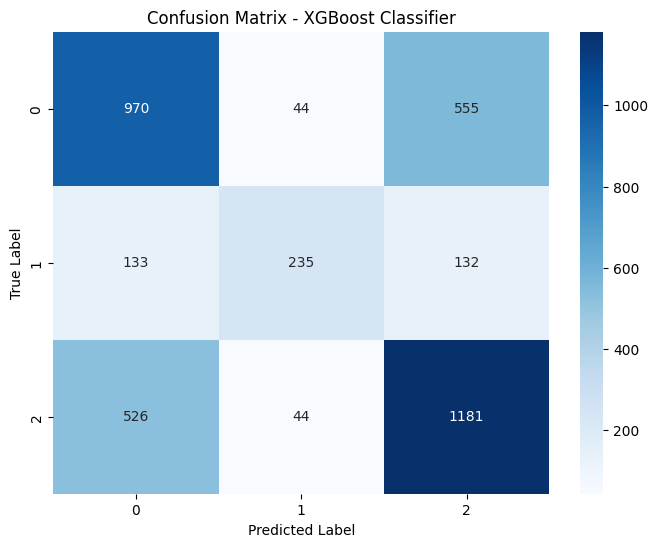

Scikit-learn XGBoost Classifier ROC AUC (One-vs-Rest):
Class 2: AUC = 0.7217469879518071
Class 0: AUC = 0.6712136322570904
Class 1: AUC = 0.6627346984655782


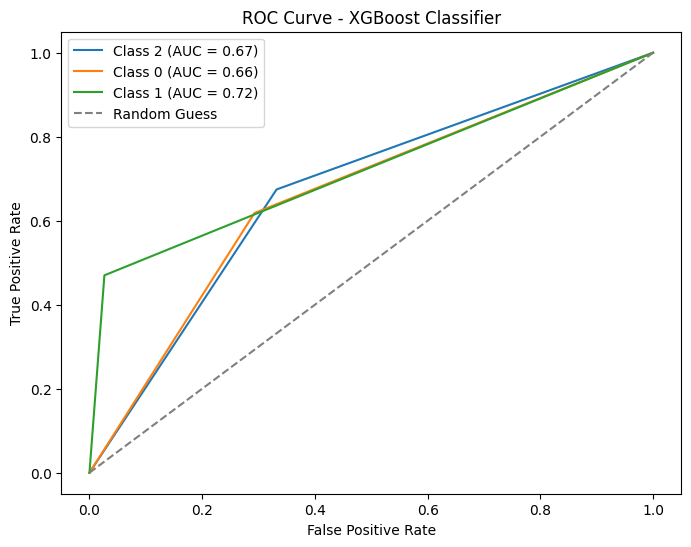

In [ ]:
from cuml.preprocessing import LabelEncoder as cuLabelEncoder
import cupy as cp
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the target classes into integer labels using CuML LabelEncoder
label_encoder = cuLabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train['uav'])
y_test_encoded = label_encoder.transform(y_test['uav'])

# Scikit-learn XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train_encoded)
y_pred_xgb = xgb_model.predict(x_test)

# Convert CuML Series to CuPy array
y_test_encoded_cp = y_test_encoded.to_cupy()

# Convert CuPy array to NumPy array
y_test_encoded_np = cp.asnumpy(y_test_encoded_cp)
y_pred_xgb_np = cp.asnumpy(y_pred_xgb)

# Calculate accuracy, precision, recall, and F1 score
accuracy_xgb = accuracy_score(y_test_encoded_np, y_pred_xgb_np)
precision_xgb = precision_score(y_test_encoded_np, y_pred_xgb_np, average='weighted')
recall_xgb = recall_score(y_test_encoded_np, y_pred_xgb_np, average='weighted')
f1_xgb = f1_score(y_test_encoded_np, y_pred_xgb_np, average='weighted')

print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

# Compute confusion matrix
confusion_matrix_xgb = confusion_matrix(y_test_encoded_np, y_pred_xgb_np)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_xgb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()

# Compute ROC curve and AUC
unique_classes = y_test_encoded.unique().to_pandas().values
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i, label in enumerate(unique_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_encoded_np == label, y_pred_xgb_np == label)
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Print ROC AUC for each class
print("Scikit-learn XGBoost Classifier ROC AUC (One-vs-Rest):")
for label in unique_classes:
    i = int(label)
    print(f"Class {label}: AUC = {roc_auc_xgb[i]}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_classes):
    plt.plot(fpr_xgb[i], tpr_xgb[i], label=f"Class {label} (AUC = {roc_auc_xgb[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Classifier")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:33:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7028795811518325
Precision: 0.7237127451455511
Recall: 0.7028795811518325
F1 Score: 0.6995565680031373


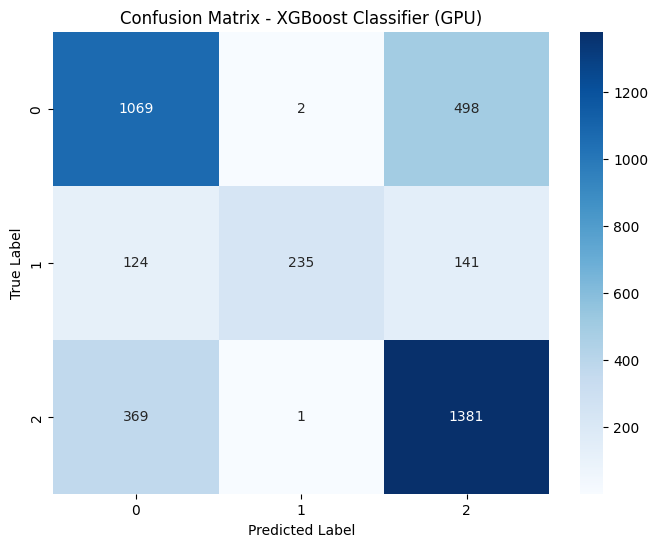

XGBoost Classifier ROC AUC (One-vs-Rest - GPU):
Class 0: AUC = 0.7311559567463679
Class 1: AUC = 0.7345481927710844
Class 2: AUC = 0.7399236616568479


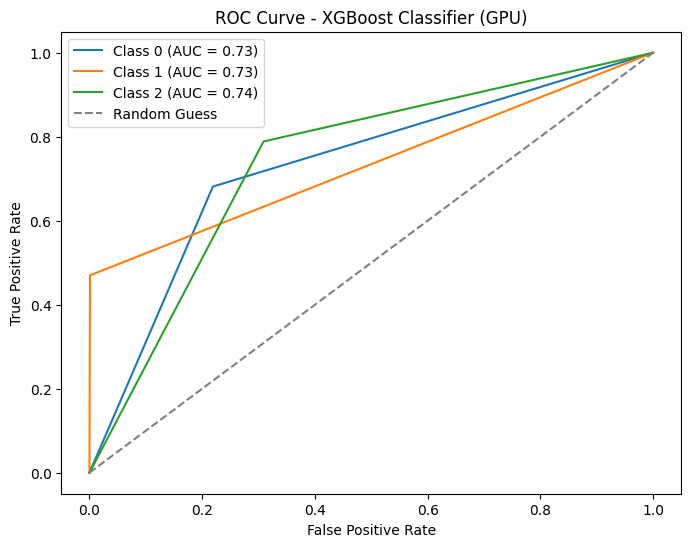

In [ ]:
import cupy as cp
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert cuDF DataFrames to cuPy arrays for XGBoost
x_train_cp = x_train.values.astype(np.float32)
x_test_cp = x_test.values.astype(np.float32)

# Encode the target classes into integer labels using CuML LabelEncoder
label_encoder = cuLabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train['uav'])
y_test_encoded = label_encoder.transform(y_test['uav'])

# Convert CuML Series to cuPy array
y_train_encoded_cp = cp.asarray(y_train_encoded)
y_test_encoded_cp = cp.asarray(y_test_encoded)

# Create DMatrix for training and testing data
dtrain = xgb.DMatrix(data=x_train_cp, label=y_train_encoded_cp)
dtest = xgb.DMatrix(data=x_test_cp)

# Parameters for GPU-accelerated XGBoost
params = {"objective": "multi:softmax", "num_class": len(label_encoder.classes_), "tree_method": "gpu_hist"}

# Train the XGBoost model on GPU
xgb_model = xgb.train(params, dtrain)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(dtest)

# Convert cuPy array to NumPy array
y_test_encoded_np = cp.asnumpy(y_test_encoded_cp)
y_pred_xgb_np = cp.asnumpy(y_pred_xgb)

# Calculate accuracy, precision, recall, and F1 score
accuracy_xgb = accuracy_score(y_test_encoded_np, y_pred_xgb_np)
precision_xgb = precision_score(y_test_encoded_np, y_pred_xgb_np, average='weighted')
recall_xgb = recall_score(y_test_encoded_np, y_pred_xgb_np, average='weighted')
f1_xgb = f1_score(y_test_encoded_np, y_pred_xgb_np, average='weighted')

print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)

# Compute confusion matrix
confusion_matrix_xgb = confusion_matrix(y_test_encoded_np, y_pred_xgb_np)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_xgb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost Classifier (GPU)")
plt.show()

# Compute ROC curve and AUC
unique_classes = np.unique(y_test_encoded_np)
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()
for i, label in enumerate(unique_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_encoded_np == label, y_pred_xgb_np == label)
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Print ROC AUC for each class
print("XGBoost Classifier ROC AUC (One-vs-Rest - GPU):")
for label in unique_classes:
    i = int(label)
    print(f"Class {label}: AUC = {roc_auc_xgb[i]}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_classes):
    plt.plot(fpr_xgb[i], tpr_xgb[i], label=f"Class {label} (AUC = {roc_auc_xgb[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Classifier (GPU)")
plt.legend()
plt.show()

Accuracy: 0.6075916230366493
Precision: 0.6066997174667769
Recall: 0.6075916230366493
F1 Score: 0.6069123191104729


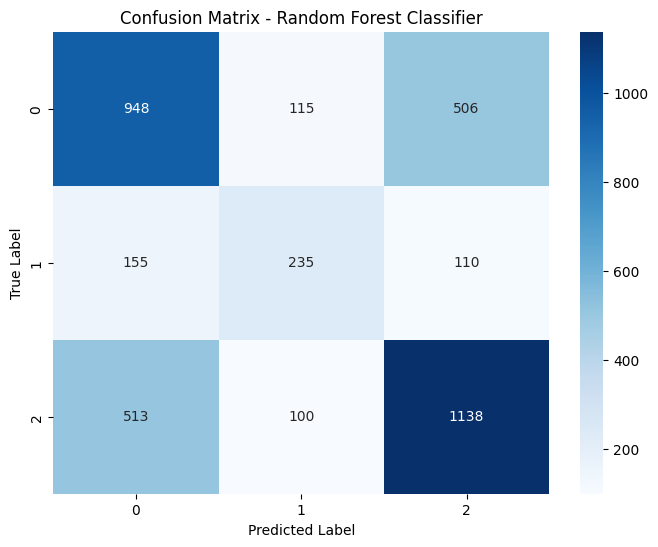

Random Forest Classifier ROC AUC: 0.45578614457831323


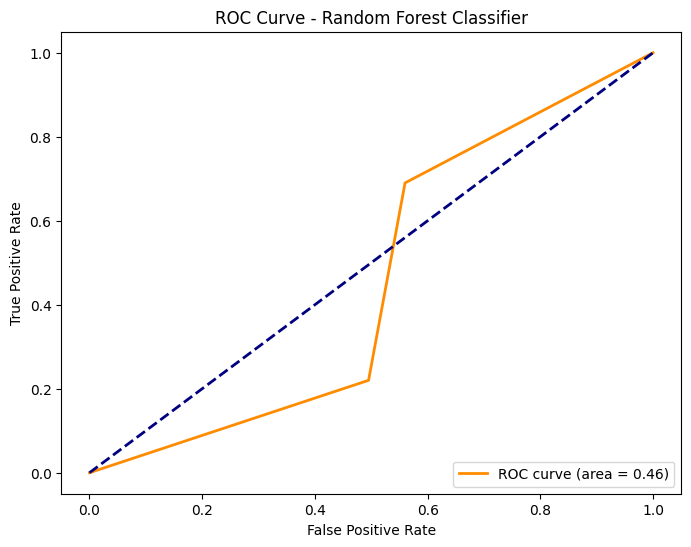

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Convert cuPy array to NumPy array
x_train_np = x_train.to_pandas().values.astype(np.float32)
x_test_np = x_test.to_pandas().values.astype(np.float32)

# Convert cuPy Series to NumPy array
y_train_np = y_train_encoded.to_pandas().values.astype(np.int32)
y_test_np = y_test_encoded.to_pandas().values.astype(np.int32)

# Train the RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train_np, y_train_np)
y_pred_rf = rf_model.predict(x_test_np)

# Calculate accuracy, precision, recall, and F1 score
accuracy_rf = accuracy_score(y_test_np, y_pred_rf)
precision_rf = precision_score(y_test_np, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_np, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_np, y_pred_rf, average='weighted')

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

# Compute confusion matrix
confusion_matrix_rf = confusion_matrix(y_test_np, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test_np, y_pred_rf, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Print ROC AUC
print("Random Forest Classifier ROC AUC:", roc_auc_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()



/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Accuracy: 0.6225130890052356
Precision: 0.6393896872992796
Recall: 0.6225130890052356
F1 Score: 0.6219823179402784


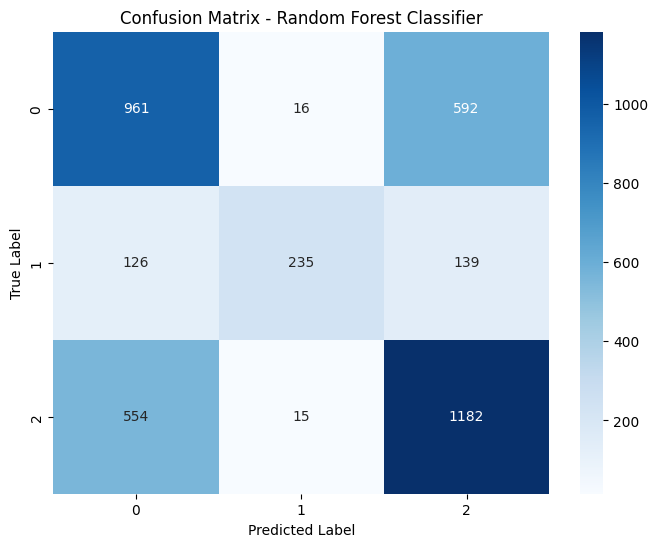

Random Forest Classifier ROC AUC (One-vs-Rest):
Class DBPower UDI: AUC = 0.6552020361179324
Class DJI Spark: AUC = 0.7303313253012048
Class Parrot Bebop: AUC = 0.660866027256675


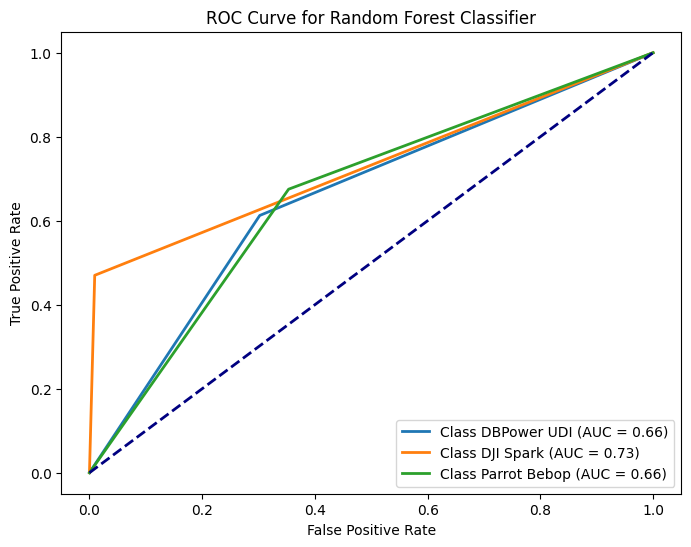

In [ ]:
from cuml.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import cupy as cp
import numpy as np

# Train the RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train_encoded)
y_pred_rf = rf_model.predict(x_test)

# Convert cuDF Series to NumPy arrays with int32 dtype
y_test_encoded_np = cp.asnumpy(y_test_encoded).astype(np.int32)
y_pred_rf_np = cp.asnumpy(y_pred_rf).astype(np.int32)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test_encoded_np, y_pred_rf_np)
precision_rf = precision_score(y_test_encoded_np, y_pred_rf_np, average='weighted')
recall_rf = recall_score(y_test_encoded_np, y_pred_rf_np, average='weighted')
f1_rf = f1_score(y_test_encoded_np, y_pred_rf_np, average='weighted')

print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

# Compute confusion matrix
conf_matrix_rf = confusion_matrix(y_test_encoded_np, y_pred_rf_np)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

# Extract unique classes from the label encoder
classes_list = label_encoder.classes_.to_pandas().tolist()

# Initialize dictionaries to store fpr, tpr, and roc_auc for each class
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

# Compute ROC curve and AUC for each class
for i, label in enumerate(classes_list):
    fpr_rf[i], tpr_rf[i], _ = roc_curve((y_test_encoded_np == i).astype(int), (y_pred_rf_np == i).astype(int))
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Print ROC AUC for each class
print("Random Forest Classifier ROC AUC (One-vs-Rest):")
for i, label in enumerate(classes_list):
    print(f"Class {label}: AUC = {roc_auc_rf[i]}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i, label in enumerate(classes_list):
    plt.plot(fpr_rf[i], tpr_rf[i], lw=2, label=f'Class {label} (AUC = {roc_auc_rf[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

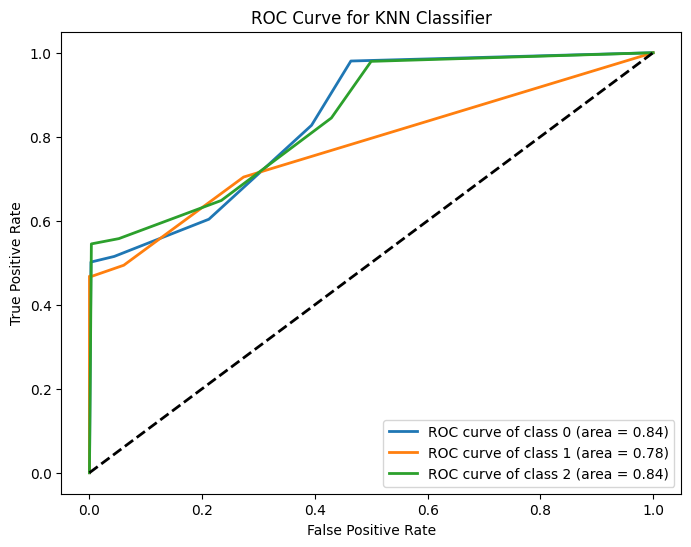

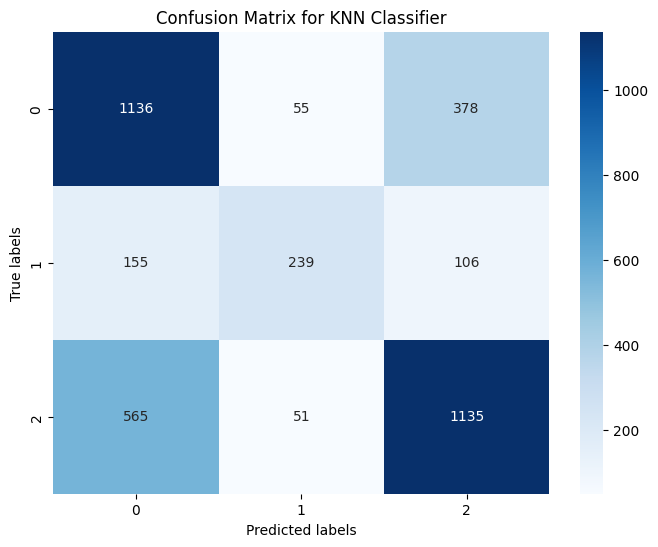

KNN Classifier Metrics:
Accuracy: 0.6570680628272252
Precision: 0.6634166551223417
Recall: 0.6570680628272252
F1 Score: 0.655263189833152


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Train the KNN classifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_np, y_train_np)

# Make predictions on the test data
y_pred_knn = knn_model.predict(x_test_np)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test_np, y_pred_knn)
precision_knn = precision_score(y_test_np, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test_np, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test_np, y_pred_knn, average='weighted')

# Binarize the labels
y_test_bin = label_binarize(y_test_np, classes=np.unique(y_test_np))

# Compute the probabilities of the positive class
y_score_knn = knn_model.predict_proba(x_test_np)

# Compute ROC curve and ROC area for each class
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(len(np.unique(y_test_np))):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin[:, i], y_score_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test_np))):
    plt.plot(fpr_knn[i], tpr_knn[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_knn[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.show()

# Compute confusion matrix
conf_matrix_knn = confusion_matrix(y_test_np, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Print evaluation metrics
print("KNN Classifier Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

Accuracy: 0.6570680628272252
Precision: 0.6616081270551276
Recall: 0.6570680628272252
F1-score: 0.6553185993302082


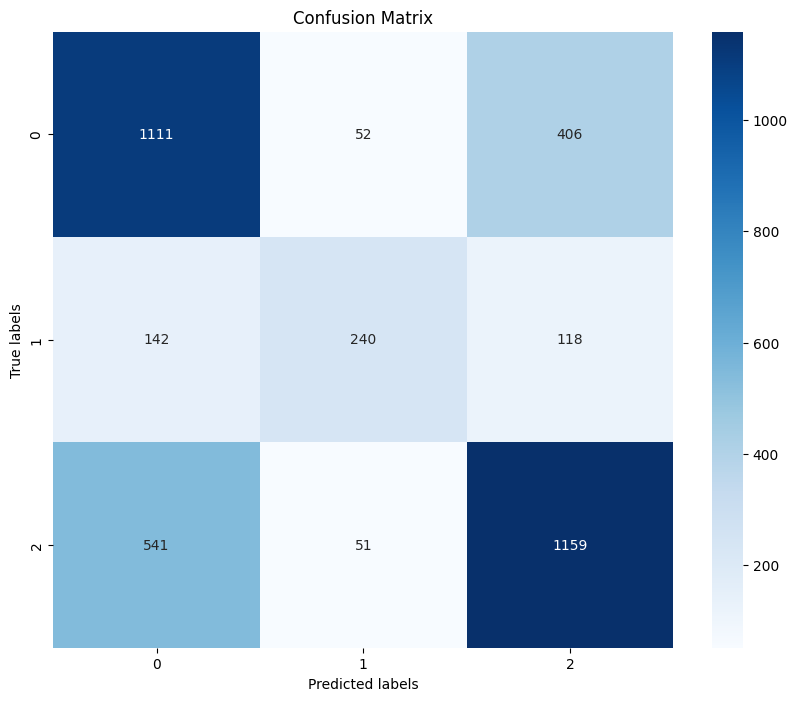

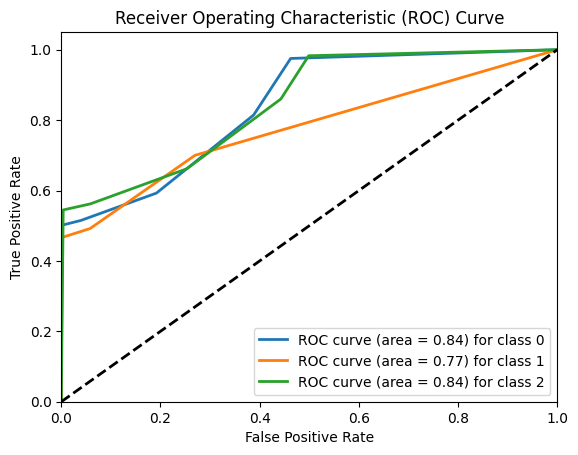

In [ ]:
from cuml.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train KNN classifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train_encoded)
y_pred_knn = knn_model.predict(x_test)

# Convert cuPy arrays to NumPy arrays for computing metrics
y_test_encoded_np = cp.asnumpy(y_test_encoded)
y_pred_knn_np = cp.asnumpy(y_pred_knn)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test_encoded_np, y_pred_knn_np)
print("Accuracy:", accuracy_knn)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_encoded_np, y_pred_knn_np, average='weighted')
recall = recall_score(y_test_encoded_np, y_pred_knn_np, average='weighted')
f1 = f1_score(y_test_encoded_np, y_pred_knn_np, average='weighted')
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded_np, y_pred_knn_np)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_test_encoded_np), yticklabels=np.unique(y_test_encoded_np))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for each class
y_pred_prob_knn = knn_model.predict_proba(x_test)

# Convert cuPy arrays to NumPy arrays for computing ROC curve
y_pred_prob_knn_np = y_pred_prob_knn.to_pandas().to_numpy()

# Compute ROC curve and ROC area for each class
num_classes = len(np.unique(y_test_encoded_np))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded_np == i, y_pred_prob_knn_np[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve (area = {0:0.2f}) for class {1}'
             ''.format(roc_auc[i], i))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Gaussian Naive Bayes Classifier Accuracy: 0.5863874345549738


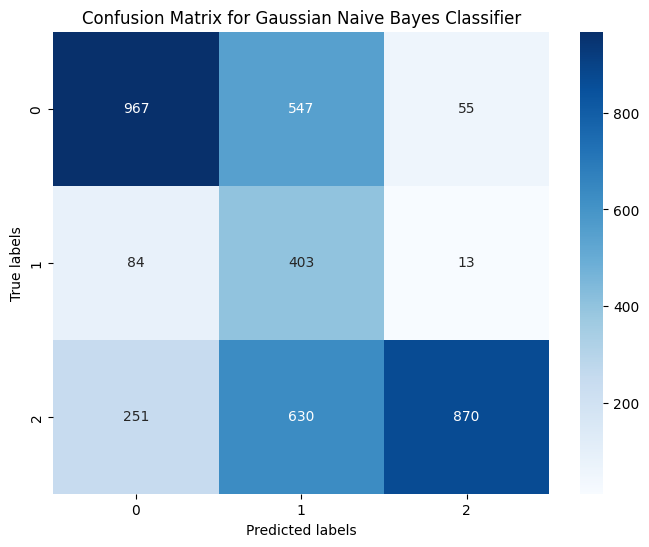

Gaussian Naive Bayes Classifier Metrics:
Accuracy: 0.5863874345549738
Precision: 0.763585162978087
Recall: 0.5863874345549738
F1 Score: 0.6240100245426663


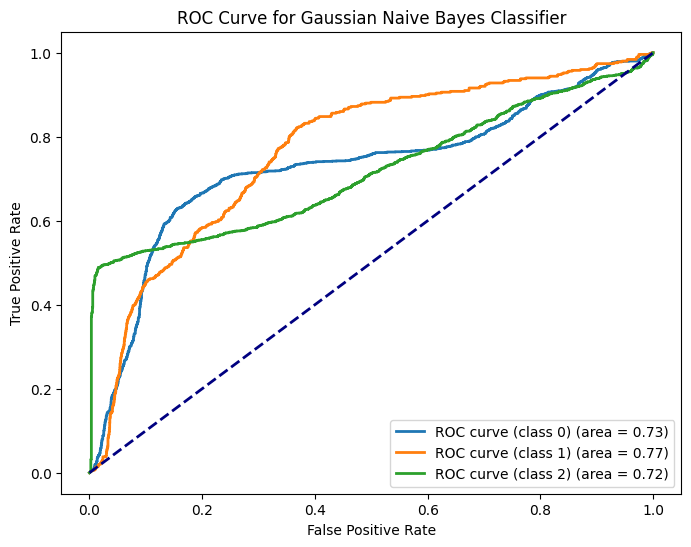

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train the Gaussian Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(x_train_np, y_train_np)
y_pred_nb = nb_model.predict(x_test_np)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test_np, y_pred_nb)
print("Gaussian Naive Bayes Classifier Accuracy:", accuracy_nb)

# Calculate precision, recall, and F1-score
precision_nb = precision_score(y_test_np, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test_np, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test_np, y_pred_nb, average='weighted')

# Compute confusion matrix
conf_matrix_nb = confusion_matrix(y_test_np, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.show()

# Print evaluation metrics
print("Gaussian Naive Bayes Classifier Metrics:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
# Compute probabilities for each class
y_prob_nb = nb_model.predict_proba(x_test_np)

# Compute ROC curve and ROC area for each class
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()
for i in range(3):
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test_bin[:, i], y_prob_nb[:, i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr_nb[i], tpr_nb[i], lw=2,
             label='ROC curve (class {0}) (area = {1:0.2f})'
             ''.format(i, roc_auc_nb[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

Decision Trees Classifier Accuracy (CPU - scikit-learn): 0.5942408376963351
Decision Trees Classifier Precision (CPU - scikit-learn): 0.5978830391421884
Decision Trees Classifier Recall (CPU - scikit-learn): 0.5942408376963351
Decision Trees Classifier F1 Score (CPU - scikit-learn): 0.595375790755621


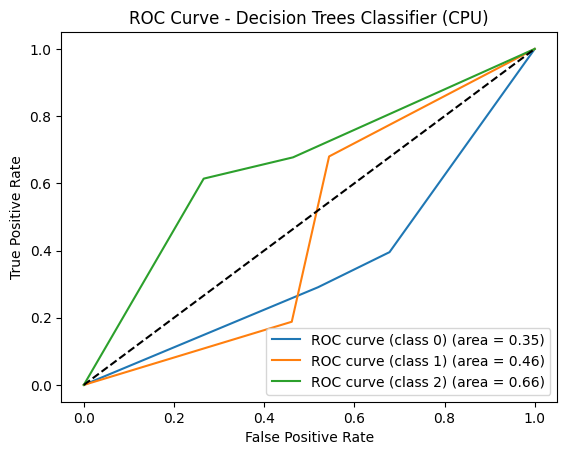

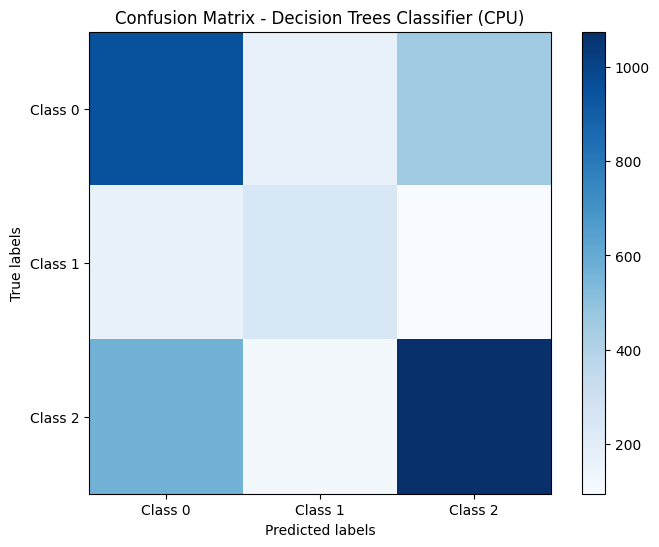

In [ ]:
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,
                             roc_curve, auc)
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize


dt_model_cpu = DecisionTreeClassifier()
dt_model_cpu.fit(x_train_np, y_train_np)
y_pred_dt_cpu = dt_model_cpu.predict(x_test_np)
accuracy_dt_cpu = accuracy_score(y_test_np, y_pred_dt_cpu)
print("Decision Trees Classifier Accuracy (CPU - scikit-learn):", accuracy_dt_cpu)

# Compute confusion matrix
conf_matrix_dt_cpu = confusion_matrix(y_test_np, y_pred_dt_cpu)

# Calculate evaluation metrics
precision_dt_cpu = precision_score(y_test_np, y_pred_dt_cpu, average='weighted')
recall_dt_cpu = recall_score(y_test_np, y_pred_dt_cpu, average='weighted')
f1_dt_cpu = f1_score(y_test_np, y_pred_dt_cpu, average='weighted')

# Print evaluation metrics
print("Decision Trees Classifier Precision (CPU - scikit-learn):", precision_dt_cpu)
print("Decision Trees Classifier Recall (CPU - scikit-learn):", recall_dt_cpu)
print("Decision Trees Classifier F1 Score (CPU - scikit-learn):", f1_dt_cpu)

fpr_dt_cpu = {}
tpr_dt_cpu = {}
roc_auc_dt_cpu = {}

# Compute ROC curve and ROC area for each class
for i in range(3):
    fpr_dt_cpu[i], tpr_dt_cpu[i], _ = roc_curve(y_test_bin[:, i], y_pred_dt_cpu)
    roc_auc_dt_cpu[i] = auc(fpr_dt_cpu[i], tpr_dt_cpu[i])

plt.figure()
for i in range(3):
    plt.plot(fpr_dt_cpu[i], tpr_dt_cpu[i], label=f'ROC curve (class {i}) (area = {roc_auc_dt_cpu[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Trees Classifier (CPU)')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_dt_cpu, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Trees Classifier (CPU)')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(3), labels=['Class 0', 'Class 1', 'Class 2'])
plt.yticks(np.arange(3), labels=['Class 0', 'Class 1', 'Class 2'])
plt.show()

Decision Trees Classifier Accuracy (GPU - cuML): 0.5945026178010471
Decision Trees Classifier Precision (GPU - cuML): 0.5983532102352077
Decision Trees Classifier Recall (GPU - cuML): 0.5945026178010471
Decision Trees Classifier F1 Score (GPU - cuML): 0.5957165778897832
Confusion Matrix (GPU - cuML):
 [[ 948  162  459]
 [ 162  249   89]
 [ 562  115 1074]]


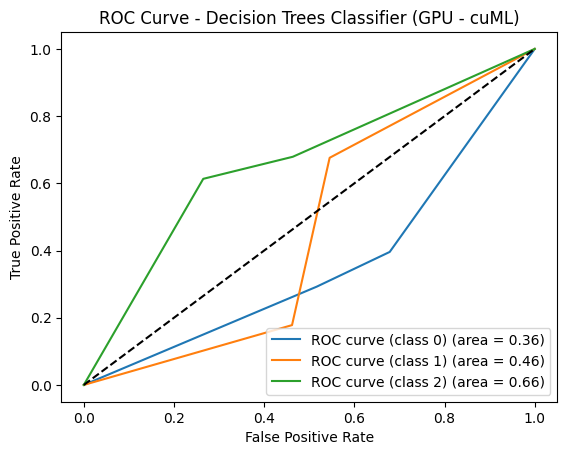

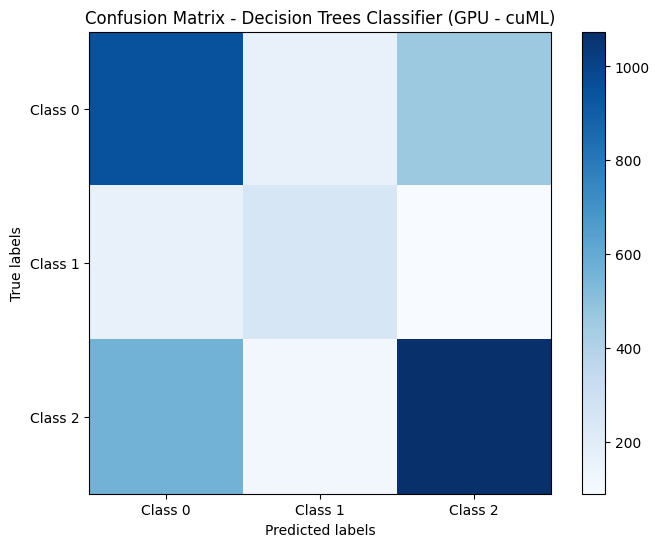

In [ ]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,
                             roc_curve, auc)


dt_model_gpu = DecisionTreeClassifier()
dt_model_gpu.fit(x_train_np, y_train_np)
y_pred_dt_gpu = dt_model_gpu.predict(x_test_np)
accuracy_dt_gpu = accuracy_score(y_test_np, y_pred_dt_gpu)
print("Decision Trees Classifier Accuracy (GPU - cuML):", accuracy_dt_gpu)

conf_matrix_dt_gpu = confusion_matrix(y_test_np, y_pred_dt_gpu)

precision_dt_gpu = precision_score(y_test_np, y_pred_dt_gpu, average='weighted')
recall_dt_gpu = recall_score(y_test_np, y_pred_dt_gpu, average='weighted')
f1_dt_gpu = f1_score(y_test_np, y_pred_dt_gpu, average='weighted')

print("Decision Trees Classifier Precision (GPU - cuML):", precision_dt_gpu)
print("Decision Trees Classifier Recall (GPU - cuML):", recall_dt_gpu)
print("Decision Trees Classifier F1 Score (GPU - cuML):", f1_dt_gpu)
print("Confusion Matrix (GPU - cuML):\n", conf_matrix_dt_gpu)

y_test_np = cp.asnumpy(y_test_np)
y_pred_dt_gpu = cp.asnumpy(y_pred_dt_gpu)

fpr_dt_gpu = {}
tpr_dt_gpu = {}
roc_auc_dt_gpu = {}

for i in range(3):
    fpr_dt_gpu[i], tpr_dt_gpu[i], _ = roc_curve(y_test_bin[:, i], y_pred_dt_gpu)
    roc_auc_dt_gpu[i] = auc(fpr_dt_gpu[i], tpr_dt_gpu[i])

plt.figure()
for i in range(3):
    plt.plot(fpr_dt_gpu[i], tpr_dt_gpu[i], label=f'ROC curve (class {i}) (area = {roc_auc_dt_gpu[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Trees Classifier (GPU - cuML)')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_dt_gpu, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Trees Classifier (GPU - cuML)')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(3), labels=['Class 0', 'Class 1', 'Class 2'])
plt.yticks(np.arange(3), labels=['Class 0', 'Class 1', 'Class 2'])
plt.show()


In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Train Gradient Boosting Trees on CPU (scikit-learn)
gbt_model_cpu = GradientBoostingClassifier()
gbt_model_cpu.fit(x_train_np, y_train_np)
y_pred_gbt_cpu = gbt_model_cpu.predict(x_test_np)

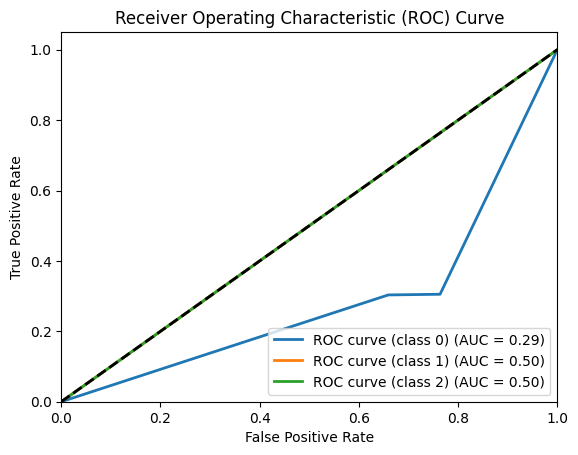

Gradient Boosting Trees Classifier Metrics (CPU - scikit-learn):
Accuracy: 0.6958115183246073
Precision: 0.7169999030496441
Recall: 0.6958115183246073
F1-score: 0.6932593837838538


<Figure size 1000x800 with 0 Axes>

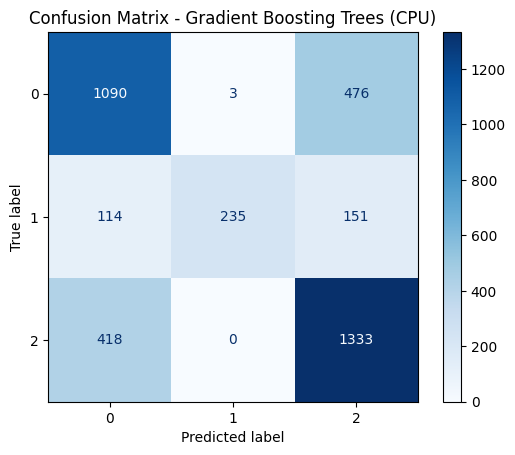

In [ ]:
# Calculate evaluation metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


accuracy_gbt_cpu = accuracy_score(y_test_np, y_pred_gbt_cpu)
precision_gbt_cpu = precision_score(y_test_np, y_pred_gbt_cpu, average='weighted')
recall_gbt_cpu = recall_score(y_test_np, y_pred_gbt_cpu, average='weighted')
f1_gbt_cpu = f1_score(y_test_np, y_pred_gbt_cpu, average='weighted')
conf_matrix_gbt_cpu = confusion_matrix(y_test_np, y_pred_gbt_cpu)

# Binarize the labels
y_test_bin = label_binarize(y_test_np, classes=np.unique(y_test_np))

# Reshape y_pred_gbt_cpu to match the shape of y_test_bin
y_pred_gbt_cpu_reshaped = np.zeros_like(y_test_bin, dtype=np.int32)
y_pred_gbt_cpu_reshaped[:, 0] = y_pred_gbt_cpu

fpr_gbt_cpu = dict()
tpr_gbt_cpu = dict()
roc_auc_gbt_cpu = dict()
for i in range(3):
    fpr_gbt_cpu[i], tpr_gbt_cpu[i], _ = roc_curve(y_test_bin[:, i], y_pred_gbt_cpu_reshaped[:, i])
    roc_auc_gbt_cpu[i] = auc(fpr_gbt_cpu[i], tpr_gbt_cpu[i])
# Plot ROC curve for each class
plt.figure()
for i in range(3):
    plt.plot(fpr_gbt_cpu[i], tpr_gbt_cpu[i], lw=2, label='ROC curve (class {0}) (AUC = {1:0.2f})'.format(i, roc_auc_gbt_cpu[i]))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Print evaluation metrics
print("Gradient Boosting Trees Classifier Metrics (CPU - scikit-learn):")
print("Accuracy:", accuracy_gbt_cpu)
print("Precision:", precision_gbt_cpu)
print("Recall:", recall_gbt_cpu)
print("F1-score:", f1_gbt_cpu)

cm_gbt_cpu = confusion_matrix(y_test_np, y_pred_gbt_cpu)


plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbt_cpu, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Gradient Boosting Trees (CPU)")
plt.show()
